### Comparison between the two optimization methods proposed  in the article: The descent-ascent procedure and the minmax swapping procedure.

##### Import modules and functions

In [1]:
import pandas as pd
import numpy as np
import time

from CytOpT.CytOpt import CytOpT
from CytOpT.plots import *

##### Import data

In [2]:
Stanford1A_values = pd.read_csv('../../data/W2_1_values.csv',
                                usecols = np.arange(1,8))
Stanford1A_clust = pd.read_csv('../../data/W2_1_clust.csv',
                               usecols = [1])
Stanford3A_values = pd.read_csv('../../data/W2_7_values.csv', 
                           usecols = np.arange(1,8))
Stanford3A_clust = pd.read_csv('../../data/W2_7_clust.csv',
                          usecols = [1])

We are in the frame work where our cytometry data are divided into 10 classes and the 7 markers available are used to estimate the class proportions in the target data set.

##### Preprocessing of the data sets

In [3]:
X_source = np.asarray(Stanford1A_values)
X_target = np.asarray(Stanford3A_values)

Lab_source = np.asarray(Stanford1A_clust['x'])
Lab_target = np.asarray(Stanford3A_clust['x'])

#####  Computation of the benchmark proportions $p$ in the target data set

In [4]:
h_target = np.zeros(10)
for k in range(10):
    h_target[k] = np.sum(Lab_target == k+1)/len(Lab_target)

print(h_target)

[0.017004   0.12873617 0.048482   0.05748411 0.00909037 0.00232408
 0.33146034 0.28171334 0.10208284 0.02162273]


### ${\tt CytOpt}$ to compute an estimate $\hat{p}$ of the class proportions.

##### Estimation with the minmax swapping procedure

Setting of the parameters

In [5]:
lbd = 0.0001
eps_one = 0.0001
n_iter = 10000
step_size = 5
power = 0.99
monitoring=True

In [9]:
t0 = time.time()

res_one = CytOpT(X_source, X_target, Lab_source, thetaTrue=h_target,
                             method="minmax",lbd=lbd,eps=eps_one,nIter=n_iter,step=step_size,power=power,monitoring=monitoring)
elapsed_time = time.time() - t0
print('Elapsed time : ',elapsed_time/60, 'Mins')

Done ( 25.654572010040283 s)

Elapsed time :  0.42776698668797813 Mins


In [10]:
res_one

{'proportions':    GoldStandard    minmax
 0      0.017004  0.044883
 1      0.128736  0.095161
 2      0.048482  0.035694
 3      0.057484  0.072252
 4      0.009090  0.010858
 5      0.002324  0.007292
 6      0.331460  0.346552
 7      0.281713  0.195632
 8      0.102083  0.182246
 9      0.021623  0.009428,
 'monitoring':         minmax
 0     0.000000
 1     2.281673
 2     1.029097
 3     2.096002
 4     2.121818
 ...        ...
 9995  0.072379
 9996  0.072412
 9997  0.072334
 9998  0.072328
 9999  0.072559
 
 [10000 rows x 1 columns]}

In [11]:
Kull_Monitoring  = res_one['monitoring']

##### Estimation with the descent-ascent procedure

In [14]:
n_it_grad = 10000
n_it_sto = 10
pas_grad = 10
eps=0.0005
monitoring=True

In [15]:
t0 = time.time()

res_two = CytOpT(X_source, X_target, Lab_source, thetaTrue=h_target,
                 method="desasc",nItGrad=n_it_grad,nItSto=n_it_sto,stepGrad=pas_grad,
                 eps=eps,monitoring=monitoring)
elapsed_time = time.time() - t0
print('Elapsed time : ',elapsed_time/60, 'Mins')


 Epsilon:  0.0005
Iteration  0
Current h_hat
[0.10079249 0.10137175 0.10140535 0.10102932 0.10138783 0.09200932
 0.10019775 0.10031088 0.10138198 0.10011334]
Iteration  100
Current h_hat
[0.11388767 0.11216471 0.10765745 0.11817556 0.07307239 0.02717509
 0.14166725 0.1199985  0.11955841 0.06664298]
Iteration  200
Current h_hat
[0.10585393 0.10685679 0.09782344 0.11734506 0.06093619 0.01859308
 0.18576318 0.12597975 0.1309119  0.04993669]
Iteration  300
Current h_hat
[0.09603723 0.11270487 0.08856879 0.11388247 0.0540255  0.0150528
 0.23108515 0.12736417 0.11602375 0.04525528]
Iteration  400
Current h_hat
[0.0924999  0.10391669 0.0755092  0.09875042 0.04407729 0.01339939
 0.27992106 0.13323963 0.1169708  0.04171561]
Iteration  500
Current h_hat
[0.08954735 0.09972782 0.07231688 0.09250119 0.03754854 0.01189592
 0.28634914 0.13851611 0.13426448 0.03733256]
Iteration  600
Current h_hat
[0.08369396 0.09640038 0.06111442 0.09007654 0.0320426  0.01033134
 0.30640833 0.13941969 0.14803946 0.

Iteration  5800
Current h_hat
[0.06237621 0.10476048 0.03133532 0.06957475 0.01262268 0.00500114
 0.32707755 0.20661319 0.16201019 0.0186285 ]
Iteration  5900
Current h_hat
[0.06306588 0.10757681 0.03102136 0.06920779 0.01245871 0.00491198
 0.34729926 0.19746236 0.14933856 0.0176573 ]
Iteration  6000
Current h_hat
[0.06368946 0.10994614 0.03186978 0.07511022 0.01297217 0.00504744
 0.33292714 0.19712346 0.15285682 0.01845737]
Iteration  6100
Current h_hat
[0.06388069 0.11143857 0.03142986 0.07358768 0.01284825 0.00505687
 0.31678913 0.20156689 0.16504893 0.01835314]
Iteration  6200
Current h_hat
[0.06367906 0.10502015 0.03093004 0.07844323 0.0131622  0.00501576
 0.30640237 0.21202794 0.16730487 0.01801439]
Iteration  6300
Current h_hat
[0.0623793  0.10252206 0.02931707 0.07263452 0.01289699 0.00481267
 0.3339071  0.19282517 0.17112065 0.01758447]
Iteration  6400
Current h_hat
[0.05634773 0.09994798 0.02834663 0.06850895 0.0124343  0.0046728
 0.34749131 0.19418738 0.17062181 0.01744111]


In [16]:
proportions = pd.concat([res_one['proportions'], res_two['proportions']], axis=1)
proportions

,GoldStandard,minmax,GoldStandard,desasc
0,0.017004,0.044883,0.017004,0.052353
1,0.128736,0.095161,0.128736,0.109642
2,0.048482,0.035694,0.048482,0.026881
3,0.057484,0.072252,0.057484,0.073233
4,0.009090,0.010858,0.009090,0.010103
5,0.002324,0.007292,0.002324,0.003822
6,0.331460,0.346552,0.331460,0.346040
7,0.281713,0.195632,0.281713,0.205624
8,0.102083,0.182246,0.102083,0.158798
9,0.021623,0.009428,0.021623,0.013504


In [17]:
monitoring = pd.concat([res_one['monitoring'], res_two['monitoring']], axis=1)
monitoring

,minmax,desasc
0,0.000000,0.799207
1,2.281673,0.778956
2,1.029097,0.770693
3,2.096002,0.768433
4,2.121818,0.749501
...,...,...
9995,0.072379,0.057667
9996,0.072412,0.057838
9997,0.072334,0.057775
9998,0.072328,0.059802


### Results of the two optimization procedures

We display the evolution of the Kullback-Leibler divergence between $\hat{p}$ and $p$, along the iterations of the two minimization procedures.

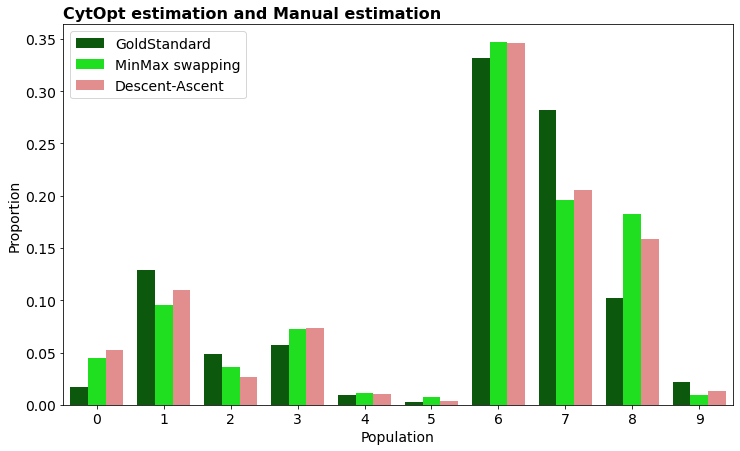

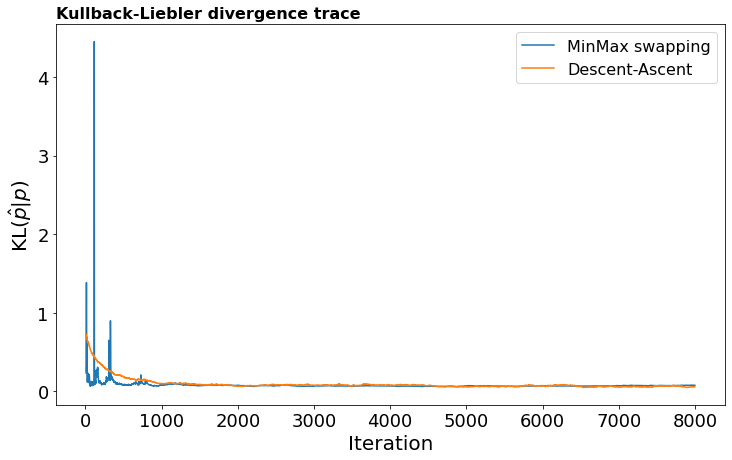

In [19]:
barPlot(proportions)
KLPlot(monitoring, n0=10, nStop=8000)